In [1]:
from fastai import *
from fastai.vision import *

In [31]:
folder = 'tesla'
file = 'download.txt'

In [34]:
folder = 'lamborghini'
file = 'lamb.txt'

In [37]:
folder = 'ferrari'
file = 'ferr.txt'

In [49]:
folder = 'wagnor'
file = 'wagnor.txt'

In [50]:
path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [51]:
download_images(path/file, dest, max_pics=200)

In [52]:
classes = ['tesla','lamborghini','ferrari','wagnor']

### Verifying images

In [53]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

tesla


lamborghini


ferrari


wagnor


### Input images in Model

In [43]:
np.random.seed(42)

In [59]:
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                 ds_tfms= get_transforms(),size=224,
                                 num_workers=4).normalize(imagenet_stats)

In [60]:
data.classes

['tesla', 'wagnor', 'lamborghini', 'ferrari']

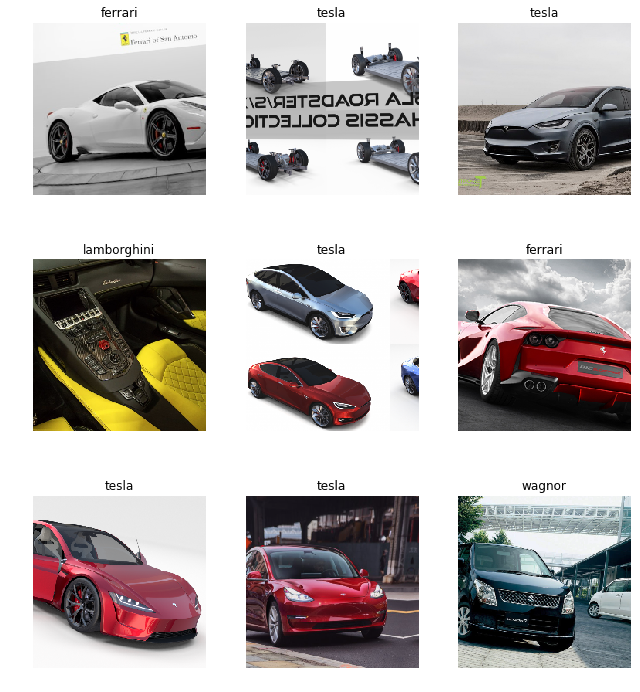

In [61]:
data.show_batch(rows=3)

In [62]:
data.c, len(data.train_ds), len(data.valid_ds)

(4, 306, 76)

### Train model

In [63]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [64]:
learn.fit_one_cycle(5)

Total time: 00:47
epoch  train_loss  valid_loss  error_rate
1      1.561422    0.807610    0.289474    (00:11)
2      1.199039    0.499615    0.197368    (00:08)
3      0.927487    0.397537    0.144737    (00:09)
4      0.765257    0.353070    0.144737    (00:09)
5      0.661025    0.344968    0.131579    (00:08)



In [65]:
learn.save('dev-1')

In [66]:
learn.unfreeze()

In [67]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


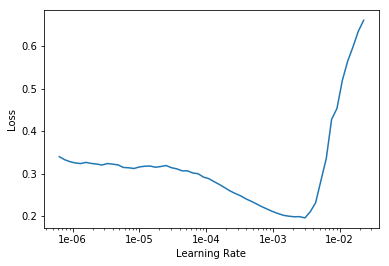

In [68]:
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(2, max_lr= slice(1e-04,1e-03))

Total time: 00:18
epoch  train_loss  valid_loss  error_rate
1      0.308198    0.242282    0.118421    (00:09)
2      0.227873    0.242245    0.092105    (00:09)



In [70]:
learn.save('dev-2')

### Intrepretation

In [72]:
learn.load('dev-2');

In [73]:
learn.load??

In [74]:
interp = ClassificationInterpretation.from_learner(learn)

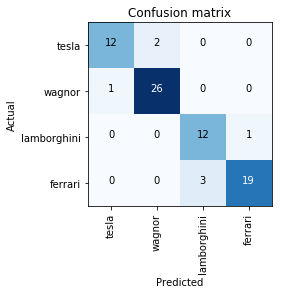

In [75]:
interp.plot_confusion_matrix()

### Cleaning data

In [76]:
from fastai.widgets import *

In [84]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [92]:
fd = ImageCleaner(ds, idxs)

'No images to show :)'

###  Deploying in Production

In [ ]:
import fastai
fastai.defaults.device = torch.device('cpu')

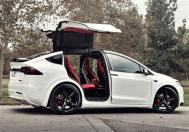

In [94]:
img = open_image(path/'tesla'/'00000002.jpg')
img

In [95]:
classes

['tesla', 'lamborghini', 'ferrari', 'wagnor']

In [96]:
data2 = ImageDataBunch.single_from_classes(path,classes,tfms=get_transforms(),
                                          size=224).normalize(imagenet_stats)

In [97]:
learn = create_cnn(data2, models.resnet34).load('dev-2')

In [99]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'tesla'

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
    
```